In [1]:
# Load packages we need
import sys
import os
import time

import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
import sklearn

from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 16})

# Let's check our software versions
print('### Python version: ' + __import__('sys').version)
print('### NumPy version: ' + np.__version__)
print('### SciPy version: ' + sp.__version__)
print('### Scikit-learn version: ' + sklearn.__version__)
print('------------')

# load our packages / code
sys.path.insert(1, '../common/')
import utils
import plots

### Python version: 3.7.11 (default, Jul 27 2021, 07:03:16) 
[Clang 10.0.0 ]
### NumPy version: 1.21.2
### SciPy version: 1.7.3
### Scikit-learn version: 1.0.2
------------


In [2]:
df = pd.read_csv('/Users/oliviapinson/Desktop/data_hacks.csv', sep='\t')

In [3]:
df

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,31,3287,1,5,2216,3,29,3895,2,...,2,1,1,2,4,60,2,1,2,NaN
39771,3,14,4792,4,41,2604,3,15,2668,4,...,1,1,1,10,0,10,2,1,4,Mathematic
39772,2,1,25147,1,4,4555,2,14,3388,1,...,2,1,1,7,1,30,1,2,3,Computer Science
39773,3,36,4286,1,34,2736,2,10,5968,2,...,2,1,1,6,1,60,1,1,2,History


In [4]:
for col in df.columns:
    if 'E' in col:
        df.drop(columns=col, inplace=True)
    elif 'TIPI' in col: 
        if '4' not in col:
            df.drop(columns=col, inplace=True)
    elif 'I' in col:
        df.drop(columns=col, inplace=True)
    elif 'Q' not in col: 
        df.drop(columns=col, inplace=True)

In [5]:
df

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q34A,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,TIPI4
0,4,4,2,4,4,4,4,4,2,1,...,3,4,4,1,2,4,3,4,4,7
1,4,1,2,3,4,4,3,4,3,2,...,2,2,3,4,2,2,1,2,2,7
2,3,1,4,1,4,3,1,3,2,4,...,4,3,4,4,4,2,2,1,4,2
3,2,3,2,1,3,3,4,2,3,3,...,4,1,1,2,1,3,4,4,2,4
4,2,2,3,4,4,2,4,4,4,3,...,4,3,4,3,3,3,4,4,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,1,3,2,3,2,1,3,1,4,...,4,1,2,4,4,2,3,1,3,5
39771,3,4,3,4,3,4,4,4,3,4,...,4,3,3,3,4,3,3,3,4,7
39772,2,1,2,1,1,1,1,1,2,1,...,1,1,1,1,1,2,1,1,1,5
39773,3,1,2,2,3,3,3,4,3,1,...,2,3,2,1,2,3,2,4,3,7


In [6]:
all_xy = np.asarray(df, dtype='float64') #matrix
assert all_xy.shape[1] == 43

## Feature Engineering

In [7]:
x_idx = range(0, 42)
all_x = all_xy[:,x_idx]
all_y = all_xy[:,42]

In [8]:
print('features: ', all_x)
print('label: ', all_y)

features:  [[4. 4. 2. ... 3. 4. 4.]
 [4. 1. 2. ... 1. 2. 2.]
 [3. 1. 4. ... 2. 1. 4.]
 ...
 [2. 1. 2. ... 1. 1. 1.]
 [3. 1. 2. ... 2. 4. 3.]
 [2. 1. 2. ... 3. 1. 4.]]
label:  [7. 7. 2. ... 5. 7. 5.]


In [63]:
for x in df.columns:
    y = df[x].value_counts()
    print(y)

2    13320
4    10393
3     9958
1     6104
Name: Q1A, dtype: int64
1    14385
2    11504
4     7351
3     6535
Name: Q2A, dtype: int64
2    14062
1    11563
3     7744
4     6406
Name: Q3A, dtype: int64
1    17757
2    11128
3     6005
4     4885
Name: Q4A, dtype: int64
2    12794
4     9788
3     9179
1     8014
Name: Q5A, dtype: int64
2    13291
4     9649
3     9512
1     7323
Name: Q6A, dtype: int64
1    18092
2    11333
3     5594
4     4756
Name: Q7A, dtype: int64
2    13471
3     9241
4     8977
1     8086
Name: Q8A, dtype: int64
2    11788
4    11734
3     9709
1     6544
Name: Q9A, dtype: int64
2    11007
1    10625
4    10274
3     7869
Name: Q10A, dtype: int64
4    13598
2    11136
3     9898
1     5143
Name: Q11A, dtype: int64
2    12601
3     9439
1     9326
4     8409
Name: Q12A, dtype: int64
4    13922
2    11200
3     9007
1     5646
Name: Q13A, dtype: int64
2    12535
4    10842
3     8897
1     7501
Name: Q14A, dtype: int64
1    19587
2    11262
3     5150
4     3776

## Train Split Validation

In [10]:
seed = 17
np.random.seed(seed)
prop_vec = [14, 3, 3]
train_x, train_y, test_x, test_y, val_x, val_y = utils.train_test_val_split(all_x, all_y, prop_vec, shuffle=True, seed=seed-1)

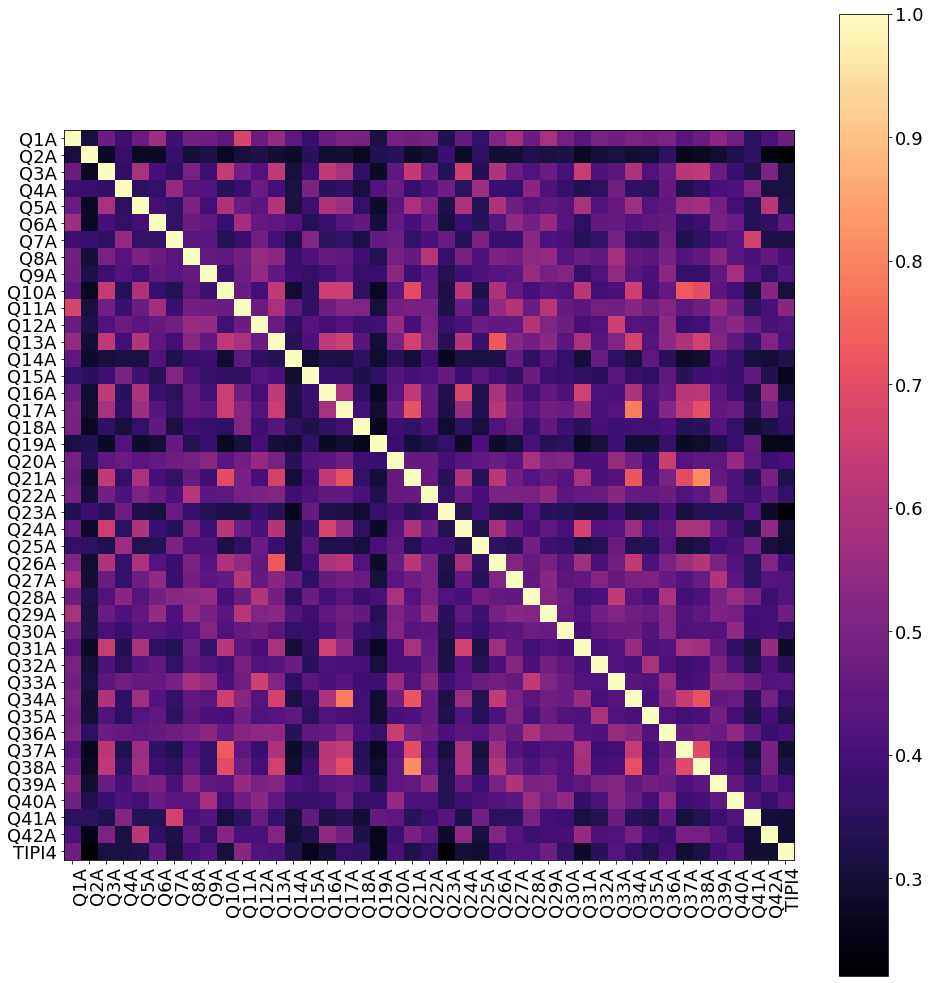

In [11]:
train_xy = np.hstack((train_x, train_y.reshape(-1,1)))
pairwise_corr = np.corrcoef(train_xy, rowvar=False)     #rowvar shows each col is var
plots.heatmap(pairwise_corr, df.columns, df.columns, rot=90, fsz=(14, 14), colorbar=True)

In [12]:
from sklearn.svm import SVC, LinearSVC
from sklearn.base import clone

svm = SVC(kernel='linear', random_state=seed)

svm.fit(train_x, train_y)

SVC(kernel='linear', random_state=17)

In [64]:
def model_accuracy(model, x, true_y):
    pred = model.predict(x)
    return np.sum(pred == true_y) / true_y.shape[0]

train_acc = model_accuracy(svm, train_x, train_y)
val_acc = model_accuracy(svm, val_x, val_y)

print('[{}] Train accuracy: {:.2f}%, Val accuracy: {:.2f}%'.format(name, train_acc*100, val_acc*100))


NameError: name 'name' is not defined